Импортирую все необходимые библиотеки 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

Набор данных классифицирует опухоли на две категории (злокачественные и доброкачественные) и содержит около 30 признаков.
Кодирую катеоригальные данные, чтобы модель могла их интерпретировать (т.е. злокачественные = 0 и доброкачественные = 1). 

In [2]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

Классифицирую новые данные с неопределенными метками,  Следовательно, нам нужно отложить данные, 
чтобы убедиться, что наша модель хорошо справляется с классификацией данных. 
По умолчанию train_test_split выделяет 25% выборок в исходном наборе данных для тестирования. 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

 По умолчанию KNeighborsClassifier ищет 5 ближайших соседей. Мы должны явно указать классификатору 
использовать евклидово расстояние для определения близости между соседними точками. 

In [8]:
k77 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
k77.fit(X_train, y_train)

<ipython-input-8-3a206d0efd64>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k77.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

Используя нашу недавно обученную модель, мы прогнозируем, является ли опухоль доброкачественной или нет, учитывая ее среднюю компактность и площадь. 

In [9]:
y_pred = knn.predict(X_test)

Визуально сравниваю прогнозы, сделанные нашей моделью, с образцами внутри набора для тестирования. 

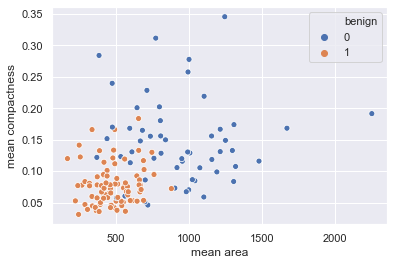

In [10]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

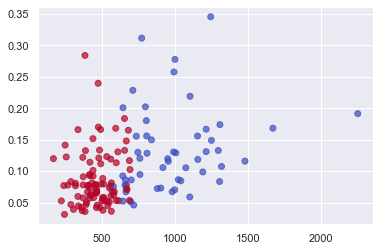

In [11]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

Другой способ оценить  модель - вычислить матрицу неточностей.

In [12]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]], dtype=int64)